In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importamos librerias.
import pandas as pd
import numpy as np # Necesario para np.nan, problema que tenemos con los datos vacios y realizar los graficos
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/ColabTest/Clase Profe/BBDD/clientes.csv"
df = pd.read_csv(path)

**Limpieza de datos con Python:**
1-Identificar y solucionar cualquier valor duplicado.
2-Asegurarse de que todas las columnas coincidan con los tipos de datos 3-indicados en el diccionario de datos.
4-Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).
5-Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.
6-Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

**Exploración de datos con Python:**
1-Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
2-Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

In [ ]:
#1-Identificar y solucionar cualquier valor duplicado.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [ ]:
# Usamos lower y replace para limpiar.
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [ ]:
#2-Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
######Todavia no puedo cambiar ya que existen informacion vacia y por ende no deja

df["totalcharges"] = df["totalcharges"].astype(float)


ValueError: could not convert string to float: ' '

In [ ]:
# Identificamos un problema el cual la columna totalcharges no se puede cambiar a float por que tiene campos vacios
#por ende no deja realizar el cambio, vamos a limpiar y al final realizar el cambio a float
problema = df[df['totalcharges'] == ' ']
display(problema)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
#Se crea una funcion para que esos datos que estan vacios los llenamos con un NAN para posteriormente borrarlos

if 'totalcharges' in df.columns:
    df['totalcharges'] = df['totalcharges'].replace(' ', np.nan)

In [ ]:
#Revisamos si quedo algun dato vacio nuevamente
problema = df[df['totalcharges'] == ' ']
display(problema)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [ ]:
#Revisamos si se agregaron los NAN
df.isnull().sum()#suma y informa todos los nulos encontrados


,0
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


In [ ]:
#Ahora Revisamos si se realizo la carga de NAN para posteriormente realizar la limpieza de esos 11 datos ya que no podemos agregar una
#media por que no tenemos conocimiento si estaria bien,  ademas son solo 11 datos, no deberia influir mucho en el calculo final

df[df["totalcharges"].isna()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
#Quitamos los datos que tienen Nan en totalchanges
df = df[~(df["totalcharges"].isna())]

In [ ]:
#Revisamos si se eliminaron
df.isnull().sum()


,0
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


In [ ]:
#Recien ahora podemos cambiar el formato de esa columna a float ya que no existe ningun dato vacio
df["totalcharges"] = df["totalcharges"].astype(float)


<ipython-input-140-172513818>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["totalcharges"] = df["totalcharges"].astype(float)


In [ ]:
#Revisamos si se realizo el cambio de Object a Float
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null   object 
 17  

In [ ]:
#3-Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats)."Se realizo arriba pero pondre igual el codigo"

# Usamos lower y replace para limpiar.
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
#4-Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.
df.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [ ]:
# Revisar duplicados.
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null   object 
 17  

In [ ]:
#Revisamos todas las columnas por si existe una duplicacion

#df["gender"].value_counts().sort_index()
#df["seniorcitizen"].value_counts().sort_index()
#df["partner"].value_counts().sort_index()
#df["tenure"].value_counts().sort_index()
#df["phoneservice"].value_counts().sort_index()
#df["multiplelines"].value_counts().sort_index()
#df["onlinesecurity"].value_counts().sort_index()
#df["onlinebackup"].value_counts().sort_index()
#df["deviceprotection"].value_counts().sort_index()
#df["techsupport"].value_counts().sort_index()
#df["streamingtv"].value_counts().sort_index()
#df["streamingmovies"].value_counts().sort_index()
#df["contract"].value_counts().sort_index()
#df["paperlessbilling"].value_counts().sort_index()
#df["paymentmethod"].value_counts().sort_index()
#df["monthlycharges"].value_counts().sort_index()
#df["totalcharges"].value_counts().sort_index()
#df["churn"].value_counts().sort_index()



In [ ]:
df[df["gender"].isna() | df["seniorcitizen"].isna() | df["partner"].isna()| df["tenure"].isna()| df["phoneservice"].isna()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [ ]:
df[df["multiplelines"].isna() | df["onlinesecurity"].isna() | df["onlinebackup"].isna()| df["deviceprotection"].isna()| df["techsupport"].isna()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [ ]:
df[df["streamingtv"].isna() | df["streamingmovies"].isna() | df["contract"].isna()| df["paperlessbilling"].isna()| df["paymentmethod"].isna()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [ ]:
df[df["monthlycharges"].isna() | df["totalcharges"].isna() | df["churn"].isna()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [ ]:
#5-Identificar y solucionar cualquier punto de dato inapropiado o inusual

#El analisis de todo el paso a paso mas arriba para seguir con el hilo y se entendiera lo que hiba haciendo y por que

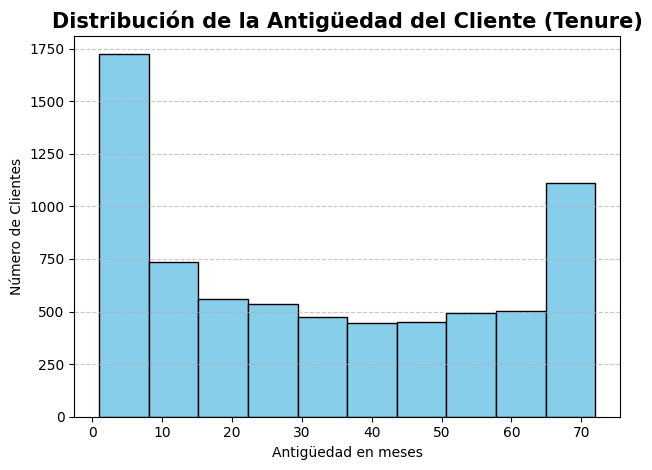

In [ ]:
#Exploración de datos con Python:
#1-Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

#Usando un histograma se analiza la columna tenure' (Antigüedad del cliente en meses).

# Creamos el histograma.
plt.hist(df['tenure'],bins=10, edgecolor='black',color="skyblue")
plt.title("Distribución de la Antigüedad del Cliente (Tenure)",fontsize=15,fontweight="bold")
plt.xlabel('Antigüedad en meses')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




**Analisis**
El histograma de tenure muestra que la compañía tiene una fuerte concentración de clientes nuevos y, a su vez, una base significativa de clientes muy antiguos y leales. La distribución en forma de 'U' sugiere un desafío en la retención de clientes con antigüedad intermedia."

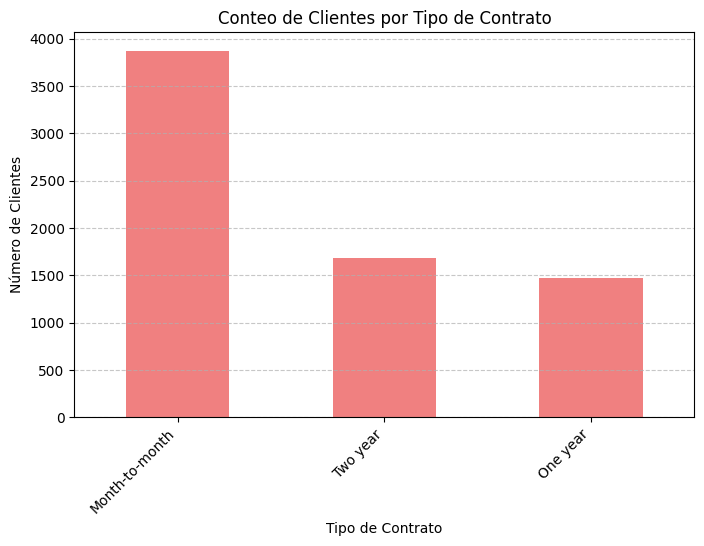

In [ ]:
#Grafico de barra para contract (Tipo de contrato del cliente)
plt.figure(figsize=(8, 5))
contrato_cliente = df['contract'].value_counts()

#Creamos el grafico de barra
contrato_cliente.plot(kind='bar', color='lightcoral')
plt.title('Conteo de Clientes por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Analisis:**
Este gráfico de barras muestra la cantidad de clientes por tipo de contrato, revelando rápidamente cuál es el más común. Si prevalece el contrato 'Mes a mes', indica mayor flexibilidad para el cliente pero un riesgo más alto de abandono (churn), a diferencia de los contratos a largo plazo que sugieren mayor compromiso. Esta distribución es esencial para evaluar la estabilidad de la base de clientes y ajustar las estrategias de retención."

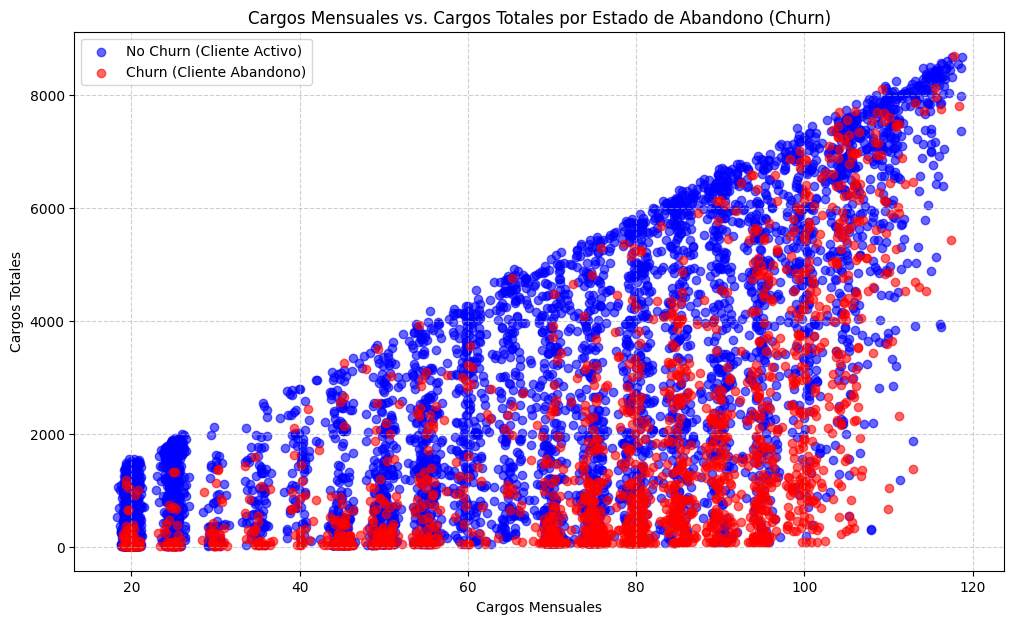

In [ ]:
#2-Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
#Grafico de dispersion donde se veran los cargos mensuales y totales
churn_si = df[df['churn'] == 'Yes']
churn_no = df[df['churn'] == 'No']

# Creamos el scatter plot.
plt.figure(figsize=(12, 7))
plt.scatter(churn_no['monthlycharges'], churn_no['totalcharges'],color='blue', label='No Churn (Cliente Activo)', alpha=0.6,)
plt.scatter(churn_si['monthlycharges'], churn_si['totalcharges'],color='red', label='Churn (Cliente Abandono)',  alpha=0.6,)

plt.title('Cargos Mensuales vs. Cargos Totales por Estado de Abandono (Churn)')
plt.xlabel('Cargos Mensuales')
plt.ylabel('Cargos Totales')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


**Analisis:**
Este gráfico de dispersión revela la relación entre los cargos mensuales y totales, destacando el estado de abandono (churn). Los clientes que abandonan (rojo) suelen ser nuevos con tarifas altas (altos cargos mensuales, bajos totales), mientras que los clientes leales (azul) muestran altos cargos tanto mensuales como totales, indicando mayor antigüedad. Este patrón es clave para identificar segmentos de clientes con riesgo de abandono."

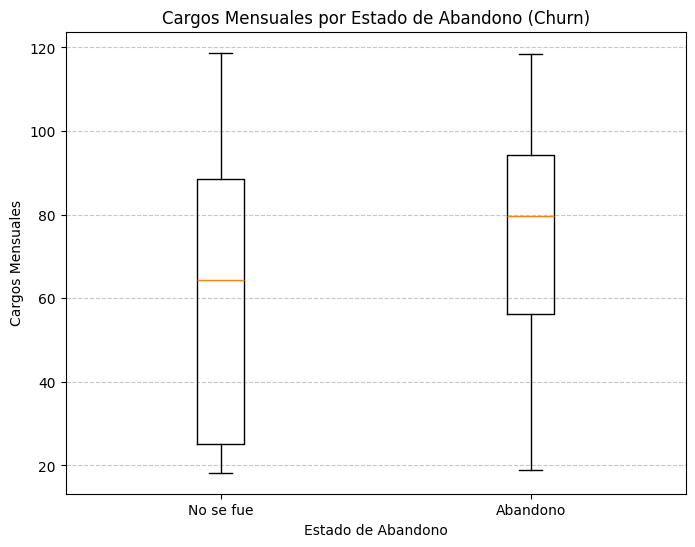

In [ ]:
#Diagrama de Boxplot : Donde se refleje los cargos Mensuales por Estado de Abandono (Churn)

cargos_no_churn = df[df['churn'] == 'No']['monthlycharges']
cargos_si_churn = df[df['churn'] == 'Yes']['monthlycharges']

# Gráfico
datos_para_grafico = [cargos_no_churn, cargos_si_churn]
etiquetas_para_grafico = ['No se fue', 'Abandono']

# Creacion del gráfico
plt.figure(figsize=(8, 6))
plt.boxplot(datos_para_grafico, tick_labels=etiquetas_para_grafico)

# Creamos el Boxplot
plt.title('Cargos Mensuales por Estado de Abandono (Churn)')
plt.xlabel('Estado de Abandono')
plt.ylabel('Cargos Mensuales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Analisis:**
Los clientes que abandonan el servicio (churn) tienden a tener cargos mensuales significativamente más altos que aquellos que se quedan. Esto sugiere que el costo elevado del servicio puede ser un factor clave en la decisión de los clientes de irse.